## Capstone Project: Analysis of Road Accidents in Catalonia

#### Applied Data Science Capstone by IBM/Coursera

### Table of Contents
1. Introduction
2. Data
3. Methodology
4. Results 
5. Discussion
6. Conclusion

### Introduction

The number of people driving the roads every day is enormous. This leads to the high importance of road safety since road injuries are one of the most common causes of accidental death. However, improving road conditions also requires a lot of resources, which makes it necessary to take a systematic approach to determine which roads are more dangerous and need immediate attention.

An effective way to define the actual riskiness of the specific road is to analyze data about road accidents. This project aims to **find features that affect road safety negatively, weigh their importance, conduct a statistical analysis of the current state of the roads, as well as suggest options for improvements**. 

It is obviously interesting for car drivers and citizens in general. Besides, this analysis can be useful for people responsible for future road improvements. The traffic police also may be interested in this analysis, since it identifies the conditions that require additional attention.


### Data

For this analysis, I have used Catalonia Road Traffic Injuries & Deaths dataset from Kaggle ([link](https://www.kaggle.com/jordigarciacastillon/road-traffic-injuries-deaths-catalonia-201020)), which consists of data from 2010 to 2020. For convenience, this dataset, as well as the results of its processing, will be placed in my GitHub repository.

First of all, this dataset needs to be translated.

In [94]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/secondaryemotion/Coursera_Capstone/master/acc_catalonia_data.csv")
df.columns=['YEAR', 'AREA', 'DATE', 'ROAD', 'KM', 'CITY', 'COUNTY', 'DEMARCATION','N_DEATHS', 'N_MAJ_INJURIES', 'N_MIN_INJURIES', 'N_VICTIMS','N_VEHICLES', 'N_PEDESTRIANS','N_BICYCLES', 'N_MOPEDS','N_MOTORCYCLES', 'N_LIGHT_VEHICLES','N_HEAVY_VEHICLES', 'N_OTHER_TYPES','N_UNKNOWN_TYPE', 'ALLOWED_SPEED', 'LEAK','FOG', 'TERRAIN', 'SPECIAL_LANE','SPECIAL_MEASURES', 'CLIMATOLOGY', 'SPECIAL_FUNCTION','SEVERITY', 'FOG_INFLUENCE', 'TERRAIN_INFLUENCE','TRAFFIC_INFLUENCE', 'WEATHER_INFLUENCE', 'WIND_INFLUENCE','LUMINOSITY_INFLUENCE', 'SPECIAL_MEASURES_INFLUENCE', 'OBJECT_INFLUENCE','FURROWS_INFLUENCE', 'VISIBILITY_INFLUENCE', 'INTERSECTION','SPEED_LIMIT_DISPLAY', 'LIGHT_CONDITIONS', 'REGULATION_OF_PRIORITY','TRACK_TRAJECTORIES', 'ACC_CLASSIFICATION', 'TYPE_OF_SECTION', 'AREA_CLASSIFICATION','ROAD_STATE', 'ROAD_TYPE', 'ROAD_OWNERSHIP','ALTIMETRIC_LAYOUT', 'WIND_CLASSIFICATION', 'WORKING_DAY', 'TIME', 'TIME_SLOT','ACC_TYPE', 'WEEKDAY']
df=df.replace({'No':'No','Si':'Yes','Sense especificar':'Not specified',"No n'hi ha":"No",'Sense Especificar':'Not specified'})
df["AREA"]=df["AREA"].replace({'Zona urbana': 'Urban area','Carretera': 'Road'})
df["TERRAIN"]=df["TERRAIN"].replace({'Desmunt':'Disassembled','A nivell':'Plane','Sense Especificar':'Not specified','Mixt':'Mixed','Terraplé':'Embankment'})
df["SPECIAL_LANE"]=df["SPECIAL_LANE"].replace({"No n'hi ha":"No", 'Carril habilitat en sentit contrari habitual':'Lane enabled in the opposite direction than usual','Habilitació voral/carril addicional':'Additional curb / lane clearance','Carril lent':'Slow lane', "Carril d'alentiment":'Slowdown lane','Altres':'Others','Carril bus':'Bus lane','Carril central':'Central lane','Carril bici':'Cycling lane','Carril avançament':'Overtaking lane','Carril reversible':'Reversible lane','Carril acceleració':'Acceleration lane'})
df["SPECIAL_MEASURES"]=df["SPECIAL_MEASURES"].replace({"No n'hi ha":"No",'Obres':'Works','Serveis de neteja o manteniment':'Cleaning or maintenance services','Esdeveniment extraordinari':'Extraordinary event','Accident trànsit anterior':'Previous traffic accident','Cons':'Built','Control policial':'Police control'})
df["CLIMATOLOGY"]=df["CLIMATOLOGY"].replace({'Bon temps':'Good weather','Pluja forta':'Heavy rain','Pluja dèbil':'Light rain','Nevant':'Snowing','Calamarsa':'Hail'})
df["SPECIAL_FUNCTION"]=df["SPECIAL_FUNCTION"].replace({'Sense funció especial':'No special function','Variant':'Alternative','Travessera':'Crossing','Ronda, cinturo o circumval.lacio':'Round, waist or circumvallation'})
df["SEVERITY"]=df["SEVERITY"].replace({'Accident greu':'Serious accident','Accident mortal':'Fatal accident'})
df["INTERSECTION"]=df["INTERSECTION"].replace({'Arribant o eixint intersecció fins 50m':'Arriving or leaving intersection up to 50m','Dintre intersecció':'Inside intersection','En secció':'In section'})
df["SPEED_LIMIT_DISPLAY"]=df["SPEED_LIMIT_DISPLAY"].replace({'Genérica via':'Generic way','Senyal velocitat':'Speed signal'})
df["LIGHT_CONDITIONS"]=df["LIGHT_CONDITIONS"].replace({'De nit, il·luminació artificial suficient':'At night, enough artificial lighting','De dia, dia clar':'Day, clear day','De nit, sense llum artificial':'At night, without artificial light','De dia, dia fosc':'Day, dark day','Alba o capvespre':'Dawn or dusk','De nit, il·luminació artificial insuficient':'At night, insufficient artificial lighting'})
df["REGULATION_OF_PRIORITY"]=df["REGULATION_OF_PRIORITY"].replace({'Sols norma prioritat de pas':'Only standart way','Senyal Stop o cedeix pas':'Stop signal or give way','Semàfor':'Traffic light','Sols marques viàries (inclou pas vianants)':'Road markings only (includes pedestrian crossing)','Persona autoritzada':'Authorized person','Altres':'Others'})
df["TRACK_TRAJECTORIES"]=df["TRACK_TRAJECTORIES"].replace({'Un sol sentit':'One way','Doble sentit':'Double way'})
df["ACC_CLASSIFICATION"]=df["ACC_CLASSIFICATION"].replace({'Encalç':'Chase','Resta sortides de via':'Other road departures','Col·lisió frontal':'Front collision','Envestida (frontal lateral)':'Onslaught (front side)','Caiguda en la via':'Fall on the road','Atropellament':'Run over','Fregament o col·lisió lateral':'Friction or side collision','Xoc contra objecte/obstacle sense sortida prèvia de via':'Collision against object / obstacle without previous derailment','Altres':'Others','Sortida de via amb xoc o col·lisió':'Derailment with collision or clash','Sortida de via amb bolcada':'Derailment with dump','Sortida de via amb atropellament':'Derailment with collision','Xoc amb animal a la calçada':'Collision with animal on the road'})
df["TYPE_OF_SECTION"]=df["TYPE_OF_SECTION"].replace({'Intersecció en T o Y':'T or Y intersection','Giratòria':'Rotary','Encreuament o intersecció en X o +':'Crossing or intersection at X or +',"Enllaç d'entrada o eixida":"Entry or exit",'Pas a nivell':'Level crossing'})
df["AREA_CLASSIFICATION"]=df["AREA_CLASSIFICATION"].replace({'Zona urbana': 'Urban area','Carretera': 'Road','Travessera':'Crossing'})
df["ROAD_STATE"]=df["ROAD_STATE"].replace({'Sec i net':'Dry and clean','Relliscós':'Slippery','Mullat':'Wet','Inundat':'Flooded','Nevat':'Snowy','Gelat':'Icy'})
df["ROAD_TYPE"]=df["ROAD_TYPE"].replace({'Via urbana( inclou carrer i carrer residencial)':'Urban road (includes street and residential street)','Carretera convencional':'Conventional road','Altres':'Others','Autopista':'Highway', 'Autovia':'Freeway', 'Camí rural/pista forestal':'Rural road / forest track'})
df['ROAD_OWNERSHIP']=df['ROAD_OWNERSHIP'].replace({'Estatal':'State','Municipal':'Municipal','Autonòmica':'Autonomous','Provincial':'Provincial','Altres':'Others'})
df["ALTIMETRIC_LAYOUT"]=df["ALTIMETRIC_LAYOUT"].replace({'Pla':'Flat','Rampa o pendent':'Ramp or slope','Canvi rasant':'Ground change', 'Gual':'Ford'})
df["WIND_CLASSIFICATION"]=df["WIND_CLASSIFICATION"].replace({'Calma, vent molt suau':'Calm, very gentle wind','Vent moderat':'Moderate wind','Vent fort':'Strong wind'})
df["WORKING_DAY"]=df["WORKING_DAY"].replace({'Feiners':'Workdays','CapDeSetmana':'Weekend'})
df["TIME_SLOT"]=df["TIME_SLOT"].replace({'Nit':'Night', 'Tarda':'Afternoon','Matí':'Morning'})
df["ACC_TYPE"]=df["ACC_TYPE"].replace({'Col.lisió de vehicles en marxa':'Collision of vehicles in motion','Sortida de la calcada sense especificar':'Unspecified track exit','Bolcada a la calcada':'Dump on the track', 'Atropellament':'Run over',"Col.lisió d'un vehicle contra un obstacle de la calcada":"Collision of a vehicle against a road obstacle",'Altres':'Others'})
df["WEEKDAY"]=df["WEEKDAY"].replace({'dill-dij':'mon-thu','dg':'sun','dis':'sat','div':'fri'})
print('Done!')

Done!


There is a lot of missing values in some additional attributes like allowed speed, regulation of priority, type of section and so on. they need to be replaced with 'Not specified'. Then we change the datatype of *‘ALLOWED_SPEED’* column from float to string. Also, value '999' in the *‘ALLOWED_SPEED’* needs to be replaced with ‘Not specified’.

In [100]:
df['ALLOWED_SPEED']=df['ALLOWED_SPEED'].astype(str)
df['ALLOWED_SPEED']=df['ALLOWED_SPEED'].replace({'999.0':'Not specified'})
df=df.replace({'nan':'Not specified'})
df=df.fillna('Not specified')
print('Done!')

Done!


This dataset has a huge number of features, so an important task is to sort essential features from irrelevant ones. We can do it by finding the number of unique values in each column.

In [101]:
df.shape

(16774, 59)

In [102]:
df.nunique()

YEAR                             9
AREA                             2
DATE                          3257
ROAD                           679
KM                            2150
CITY                           854
COUNTY                          42
DEMARCATION                      4
N_DEATHS                         8
N_MAJ_INJURIES                  11
N_MIN_INJURIES                  19
N_VICTIMS                       21
N_VEHICLES                      15
N_PEDESTRIANS                    7
N_BICYCLES                       9
N_MOPEDS                         4
N_MOTORCYCLES                    7
N_LIGHT_VEHICLES                12
N_HEAVY_VEHICLES                 7
N_OTHER_TYPES                    4
N_UNKNOWN_TYPE                   1
ALLOWED_SPEED                   16
LEAK                             3
FOG                              2
TERRAIN                          5
SPECIAL_LANE                    13
SPECIAL_MEASURES                 8
CLIMATOLOGY                      6
SPECIAL_FUNCTION    

Since the total number of entries in this dataset is 16774, there is no benefit in using features *‘CITY’*, *‘TIME’*, *‘KM’* in further analysis. *'ROAD'* feature will be useful later, so we'll save it in a different copy of this dataset.

*'DATE'* will be replaced with *'MONTH'*, and a list of features with data, which can be obtained only after the accident, will be dropped.

In [183]:
pd.options.mode.chained_assignment = None
df['DATE'] = pd.to_datetime(df['DATE'],format='%d/%m/%Y')
df['MONTH']=pd.Series(int)
for id,item in enumerate(df['DATE']):
    df['MONTH'].iloc[id]=item.month
    
roaddf=df[['AREA', 'MONTH','ROAD', 'COUNTY', 'DEMARCATION','N_DEATHS', 'N_MAJ_INJURIES', 'ALLOWED_SPEED', 'LEAK','FOG', 'TERRAIN', 'SPECIAL_LANE','SPECIAL_MEASURES', 'CLIMATOLOGY', 'SPECIAL_FUNCTION','INTERSECTION', 'LIGHT_CONDITIONS', 'REGULATION_OF_PRIORITY','TRACK_TRAJECTORIES', 'TYPE_OF_SECTION', 'AREA_CLASSIFICATION','ROAD_STATE', 'ROAD_TYPE', 'ROAD_OWNERSHIP','ALTIMETRIC_LAYOUT', 'WIND_CLASSIFICATION', 'TIME_SLOT','WEEKDAY']]
maindf=df[['AREA', 'MONTH','COUNTY', 'DEMARCATION','N_DEATHS', 'N_MAJ_INJURIES', 'ALLOWED_SPEED', 'LEAK','FOG', 'TERRAIN', 'SPECIAL_LANE','SPECIAL_MEASURES', 'CLIMATOLOGY', 'SPECIAL_FUNCTION','INTERSECTION', 'LIGHT_CONDITIONS', 'REGULATION_OF_PRIORITY','TRACK_TRAJECTORIES', 'TYPE_OF_SECTION', 'AREA_CLASSIFICATION','ROAD_STATE', 'ROAD_TYPE', 'ROAD_OWNERSHIP','ALTIMETRIC_LAYOUT', 'WIND_CLASSIFICATION', 'TIME_SLOT','WEEKDAY']]
print('Done!')

Done!


In [184]:
maindf.head()

,AREA,MONTH,COUNTY,DEMARCATION,N_DEATHS,N_MAJ_INJURIES,ALLOWED_SPEED,LEAK,FOG,TERRAIN,...,TRACK_TRAJECTORIES,TYPE_OF_SECTION,AREA_CLASSIFICATION,ROAD_STATE,ROAD_TYPE,ROAD_OWNERSHIP,ALTIMETRIC_LAYOUT,WIND_CLASSIFICATION,TIME_SLOT,WEEKDAY
0,Urban area,1,Valles Oriental,Barcelona,0,1,100.0,No,No,Disassembled,...,One way,T or Y intersection,Urban area,Dry and clean,Urban road (includes street and residential st...,Not specified,Not specified,"Calm, very gentle wind",Night,mon-thu
1,Road,10,Segria,Lleida,0,1,40.0,No,No,Plane,...,Double way,Rotary,Road,Dry and clean,Conventional road,State,Flat,"Calm, very gentle wind",Night,sun
2,Road,5,Girones,Girona,1,0,80.0,No,No,Plane,...,Double way,Not specified,Road,Dry and clean,Conventional road,State,Ramp or slope,"Calm, very gentle wind",Afternoon,mon-thu
3,Urban area,8,Barcelones,Barcelona,0,2,100.0,No,No,Not specified,...,One way,Crossing or intersection at X or +,Urban area,Dry and clean,Urban road (includes street and residential st...,Not specified,Not specified,"Calm, very gentle wind",Night,sat
4,Urban area,5,Barcelones,Barcelona,0,1,100.0,No,No,Not specified,...,One way,Crossing or intersection at X or +,Urban area,Dry and clean,Urban road (includes street and residential st...,Not specified,Not specified,"Calm, very gentle wind",Afternoon,fri


To determine the strength of correlation between values, we need to convert them to a numerical format using LabelEncoder from sklearn library, calculate the Pearson coefficient and represent it as a heatmap. Also, we will show a list of the found relationships with the absolute value of the Pearson coefficient exceeding 0.7.

0.7232024920201996 0.0 AREA AREA_CLASSIFICATION
0.8843542220096519 0.0 AREA ROAD_TYPE
0.7232024920201996 0.0 AREA_CLASSIFICATION AREA
0.8735443956409672 0.0 AREA_CLASSIFICATION ROAD_TYPE
0.8843542220096519 0.0 ROAD_TYPE AREA
0.8735443956409672 0.0 ROAD_TYPE AREA_CLASSIFICATION


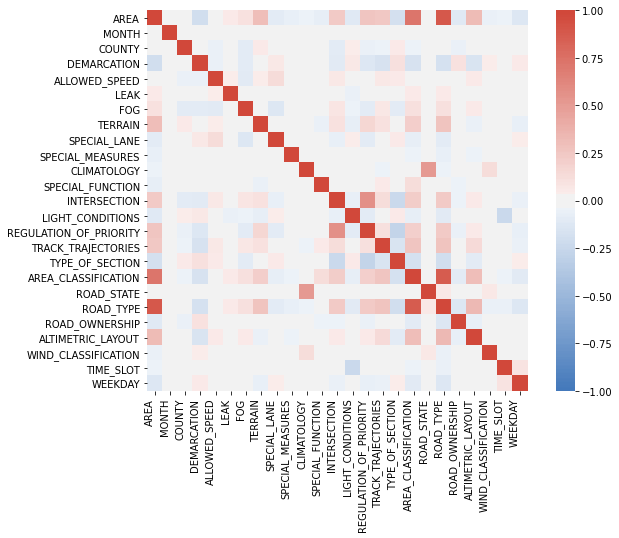

In [205]:
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import figure

subdf = maindf.copy()
subdf.drop(columns=['N_DEATHS', 'N_MAJ_INJURIES'],inplace=True)
le = preprocessing.LabelEncoder()
for id,item in enumerate(subdf):
    le.fit(subdf[item])
    subdf[item]=le.transform(subdf[item])

subdf_cols=subdf.columns
size=(subdf_cols).size
coef=[[0 for i in range(size)] for j in range(size)]
pval=[[0 for i in range(size)] for j in range(size)]
for id,item in enumerate(subdf_cols):
    i=id
    for id,item2 in enumerate(subdf_cols):
        pcoef, p_value=stats.pearsonr(subdf[item],subdf[item2])
        coef[i][id]=pcoef
        pval[i][id]=p_value
        if (abs(pcoef)>0.7) & (item!=item2):
            print(pcoef, p_value, item, item2)
            
ax = plt.subplots(figsize=(10,7)) 
ax = sns.heatmap(
    coef, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 15, n=200),
    square=True
)
ax.set_xticklabels(subdf, rotation=90, horizontalalignment='right')
ax.set_yticklabels(subdf, rotation=0, horizontalalignment='right')
xticks=range(size)
ax.set_yticks=range(size)

All three features are related. Values of *‘AREA’* and *‘AREA_CLASSIFICATION’* columns are close. Thus, the *‘AREA’* column can be dropped. The *‘ROAD_TYPE’* column can be dropped, too.

In [106]:
maindf.drop(columns=['AREA', 'ROAD_TYPE'], inplace=True)
print('Done!')

Done!


After all, there should be 23 features and 2 target variables in the dataset.

In [108]:
maindf.shape

(16774, 25)

### Methodology

First, we need to determine the contribution of each road feature to the overall hazard ratio. We'll add a temporary column *'count'* to track the number of entries for every unique value of the features. Also, we need to pick out maximum values of hazard coefficient.

In [169]:
hazard_coefs={}
maindf['count']=1
df_col=maindf.columns.drop(labels=['N_DEATHS', 'N_MAJ_INJURIES','count'])
max_hazard=[0]*len(df_col)
for id,item in enumerate(df_col):
    hazard_coefs[id]=maindf.groupby([item],as_index=False).sum()
    hazard_coefs[id]['coef_deaths']=(hazard_coefs[id]['N_DEATHS'])/(hazard_coefs[id]['count'])
    hazard_coefs[id]['coef_maj_inj']=(hazard_coefs[id]['N_MAJ_INJURIES'])/(hazard_coefs[id]['count'])
    hazard_coefs[id]['hazard_coef']=hazard_coefs[id]['coef_deaths']+hazard_coefs[id]['coef_maj_inj']
    hazard_coefs[id].drop(labels=['N_DEATHS', 'N_MAJ_INJURIES','count','coef_maj_inj','coef_deaths'],axis=1,inplace=True)
    for i in range(len(hazard_coefs[id]['hazard_coef'])):
        if (hazard_coefs[id]['hazard_coef'][i] > max_hazard[id]):
            max_hazard[id]=hazard_coefs[id]['hazard_coef'][i].copy()

From the maximum values of the coefficients, we determine the maximum possible value of the hazard coefficient, carry out normalization and use its results to determine the weight of each component of the coefficient. Individual values of hazard coefficient for each value are normalized to the weight of the coefficient component.

In [170]:
max_haz_coef=sum(max_hazard)
weighted_max_hazard=[0]*len(df_col)
for i in range(len(df_col)):
    weighted_max_hazard[i]=max_hazard[i]/max_haz_coef

for i in range(len(df_col)):
    for j in range(len(hazard_coefs[i]['hazard_coef'])):
        hazard_coefs[i]['hazard_coef'][j] = hazard_coefs[i]['hazard_coef'][j]/max_hazard[i]*weighted_max_hazard[i]

We now have hazard coefficient values for all road features.

In [171]:
hazard_coefs

{0:     MONTH  hazard_coef
 0       1     0.037543
 1       2     0.036599
 2       3     0.038224
 3       4     0.037224
 4       5     0.036396
 5       6     0.037824
 6       7     0.038408
 7       8     0.039868
 8       9     0.037214
 9      10     0.036748
 10     11     0.037371
 11     12     0.037592,
 1:                COUNTY  hazard_coef
 0            Alt Camp     0.037613
 1         Alt Emporda     0.039892
 2         Alt Penedes     0.037273
 3          Alt Urgell     0.043434
 4      Alta Ribagorca     0.033979
 5               Anoia     0.039971
 6               Bages     0.041059
 7           Baix Camp     0.037426
 8           Baix Ebre     0.041962
 9        Baix Emporda     0.038584
 10     Baix Llobregat     0.035357
 11       Baix Penedes     0.036645
 12         Barcelones     0.035171
 13           Bergueda     0.043434
 14           Cerdanya     0.041596
 15   Conca de Barbera     0.043844
 16             Garraf     0.036400
 17          Garrigues     0.0451

Let's represent the influence of each feature on the total coefficient in the form of a graph.

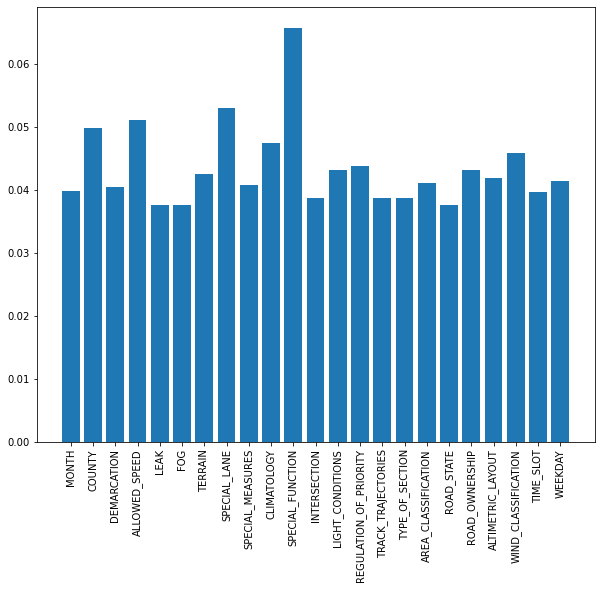

In [181]:
plt.figure(figsize=((10,8)))
plt.bar(df_col, weighted_max_hazard)
plt.xticks(rotation=90)
plt.show()